<a href="https://colab.research.google.com/github/hyhyhy04/colabpython/blob/main/PythonDataTeam2_%EC%88%98%EC%A0%95%EC%A4%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Colab에서 한글 폰트 설정용
!apt-get update -qq
!apt-get install -y fonts-nanum

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')  # 설치한 폰트로 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 93 not upgraded.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving culture_participation.csv to culture_participation (1).csv
Saving life_satisfaction.csv to life_satisfaction.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 불러오기
df_culture = pd.read_csv('culture_participation.csv', encoding='cp949')
df_life = pd.read_csv('life_satisfaction.csv', encoding='cp949')

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51313 (\N{HANGUL SYLLABLE JOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

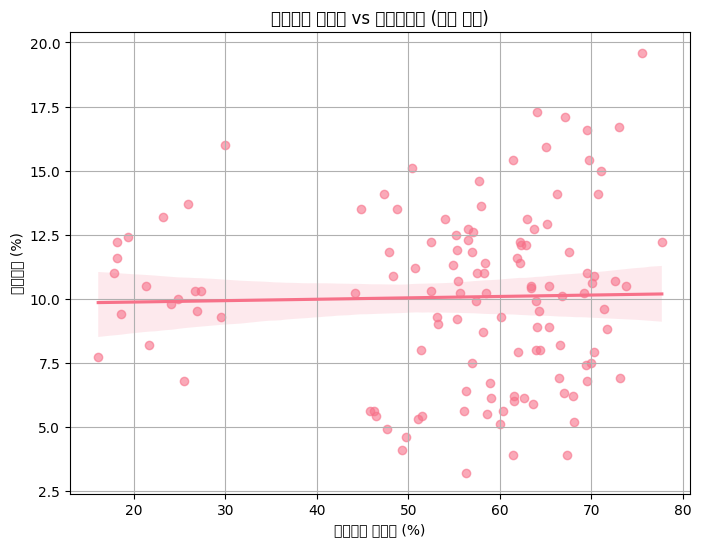

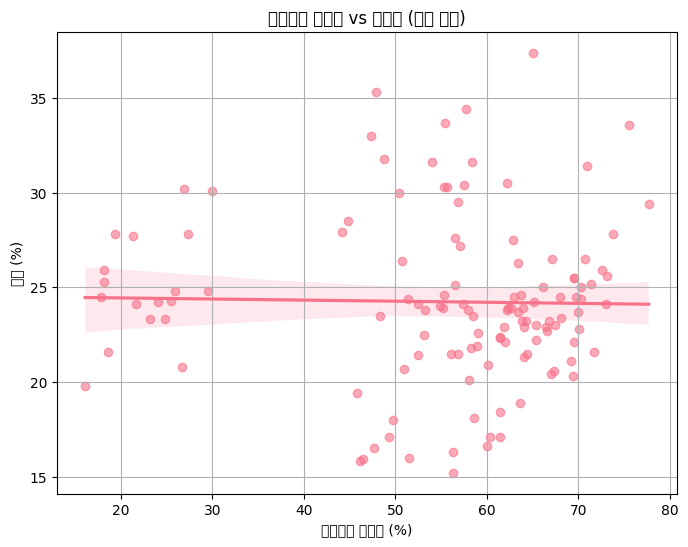

In [ ]:
# 만족도 전처리
df_life = df_life.rename(columns={'행정구역별(1)': '지역'})
df_life = df_life[df_life['지역'] != '행정구역별(1)']  # 첫 행 제거

years = ['2011', '2013', '2015', '2017', '2019', '2021', '2023']
sum_cols = years
very_cols = [f"{year}.1" for year in years]

df_sum = df_life[['지역'] + sum_cols].copy()
df_sum = df_sum.melt(id_vars='지역', var_name='년도', value_name='계')

df_very = df_life[['지역'] + very_cols].copy()
df_very.columns = ['지역'] + years
df_very = df_very.melt(id_vars='지역', var_name='년도', value_name='매우만족')

satisfied_cols = [f"{year}.2" for year in years]

df_satis = df_life[['지역'] + satisfied_cols].copy()
df_satis.columns = ['지역'] + years
df_satis = df_satis.melt(id_vars='지역', var_name='년도', value_name='만족')

df_life_long = pd.merge(df_sum, df_very, on=['지역', '년도'])
df_life_long = pd.merge(df_life_long, df_satis, on=['지역', '년도'])


#  문화관람 전처리
df_culture = df_culture.rename(columns={'행정구역별(1)': '지역'})
df_culture = df_culture[df_culture['지역'] != '행정구역별(1)']

df_culture_melted = df_culture.melt(id_vars='지역', var_name='년도', value_name='문화예술관람률')


df_culture_melted['년도'] = df_culture_melted['년도'].astype(str)
df_life_long['년도'] = df_life_long['년도'].astype(str)

# 데이터 병합
df_merged = pd.merge(df_life_long, df_culture_melted, on=['지역', '년도'])

# 숫자형 변환
for col in ['계', '매우만족', '만족', '문화예술관람률']:
    df_merged[col] = pd.to_numeric(df_merged[col], errors='coerce')

# 분석 & 시각화 함수
def plot_relation(x, y, title):
    plt.figure(figsize=(8,6))
    sns.regplot(data=df_merged, x=x, y=y, scatter_kws={'alpha':0.6})
    plt.title(title)
    plt.xlabel('문화예술 관람률 (%)')
    plt.ylabel(f'{y} (%)')
    plt.grid(True)
    plt.show()

# 시각화
plot_relation('문화예술관람률', '매우만족', '문화예술 관람률 vs 매우만족도 (전체 연도)')
plot_relation('문화예술관람률', '만족', '문화예술 관람률 vs 만족도 (전체 연도)')

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51313 (\N{HANGUL SYLLABLE JOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

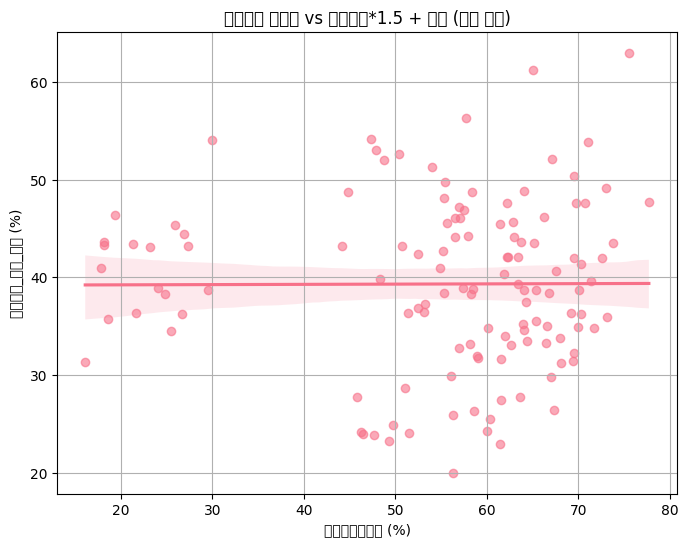

In [ ]:
# 연도 설정
years = ['2011', '2013', '2015', '2017', '2019', '2021', '2023']

# 매우만족, 만족, 보통 열 나누기
sum_cols = years
very_satisfied_cols = [f"{year}.1" for year in years]
satisfied_cols = [f"{year}.2" for year in years]

# 각각 melt 처리
df_sum = df_life[['지역'] + sum_cols].copy()
df_sum = df_sum.melt(id_vars='지역', var_name='년도', value_name='계')

df_very = df_life[['지역'] + very_satisfied_cols].copy()
df_very.columns = ['지역'] + years
df_very = df_very.melt(id_vars='지역', var_name='년도', value_name='매우만족')

df_satis = df_life[['지역'] + satisfied_cols].copy()
df_satis.columns = ['지역'] + years
df_satis = df_satis.melt(id_vars='지역', var_name='년도', value_name='만족')

# 병합
df_life_long = df_sum.merge(df_very, on=['지역', '년도']).merge(df_satis, on=['지역', '년도'])

# 2. culture_participation 전처리
df_culture = df_culture.rename(columns={'행정구역별(1)': '지역'})
df_culture = df_culture[df_culture['지역'] != '행정구역별(1)']
df_culture_melted = df_culture.melt(id_vars='지역', var_name='년도', value_name='문화예술관람률')

# 연도 형식 맞추기
df_culture_melted['년도'] = df_culture_melted['년도'].astype(str)
df_life_long['년도'] = df_life_long['년도'].astype(str)

# 병합
df_merged = pd.merge(df_life_long, df_culture_melted, on=['지역', '년도'])

# 숫자형 변환
for col in ['계', '매우만족', '만족', '문화예술관람률']:
    df_merged[col] = pd.to_numeric(df_merged[col], errors='coerce')

# ✅ 새로운 계산: (매우만족 * 1.5 + 만족)
df_merged['매우만족_만족_조합'] = df_merged['매우만족'] * 1.5 + df_merged['만족']

# 시각화 함수
def plot_relation(x, y, title):
    plt.figure(figsize=(8,6))
    sns.regplot(data=df_merged, x=x, y=y, scatter_kws={'alpha':0.6})
    plt.title(title)
    plt.xlabel(f'{x} (%)')
    plt.ylabel(f'{y} (%)')
    plt.grid(True)
    plt.show()

# ✅ 시각화 실행: 삶의 만족도 vs (매우만족 * 1.5 + 만족)
plot_relation('문화예술관람률', '매우만족_만족_조합', '문화예술 관람률 vs 매우만족*1.5 + 만족 (전체 연도)')
